# ft_sommelier | 42 Silicon Valley
***

# V.1 Exploring the green reds
**As a beginner in machine learning, you recall that one of the best things to do before
breaking out the machine learning tools is to explore and look at your data.**
***
**a)** Write a function that will plot a scatterplot matrix of your red wine data. Your
function should plot wines with quality over some “good_threshold” as one color,
and wines below some “bad_threshold” as another. Your plotting function should
have the option to save a .png of your plots.
***

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
rw_data = pd.read_csv('resources/winequality-red.csv', delimiter=';')

# Function to map the colors as a list from the input list of x variables
def pltcolor(lst, good, bad):
    cols=[]
    for l in lst:
        if l >= good:
            cols.append('#0099ff')
        elif l <= bad:
            cols.append('#800000')
        else:
            cols.append('white')
    return cols

def plot_scatter_matrix(wine_data, good_threshold, bad_threshold, save_plot=False):
    x,y = wine_data.shape
    fig, ax = plt.subplots(y, y, figsize=(65,65))
    # Color for each value based on the 'quality' column
    cols = pltcolor(wine_data.iloc[:, y - 1], good_threshold, bad_threshold)
    for i in range(0, y):
        for j in range(0, y):
            if (i != j):
                ax[i, j].scatter(wine_data.iloc[:, i], wine_data.iloc[:, j], c=cols)
            else:
                ax[i, j].text(0.5, 0.5, s=wine_data.iloc[:, i].name, fontsize=20, horizontalalignment='center', verticalalignment='center')
    if (save_plot):
        plt.savefig('v1_a_result.png')
    plt.show()

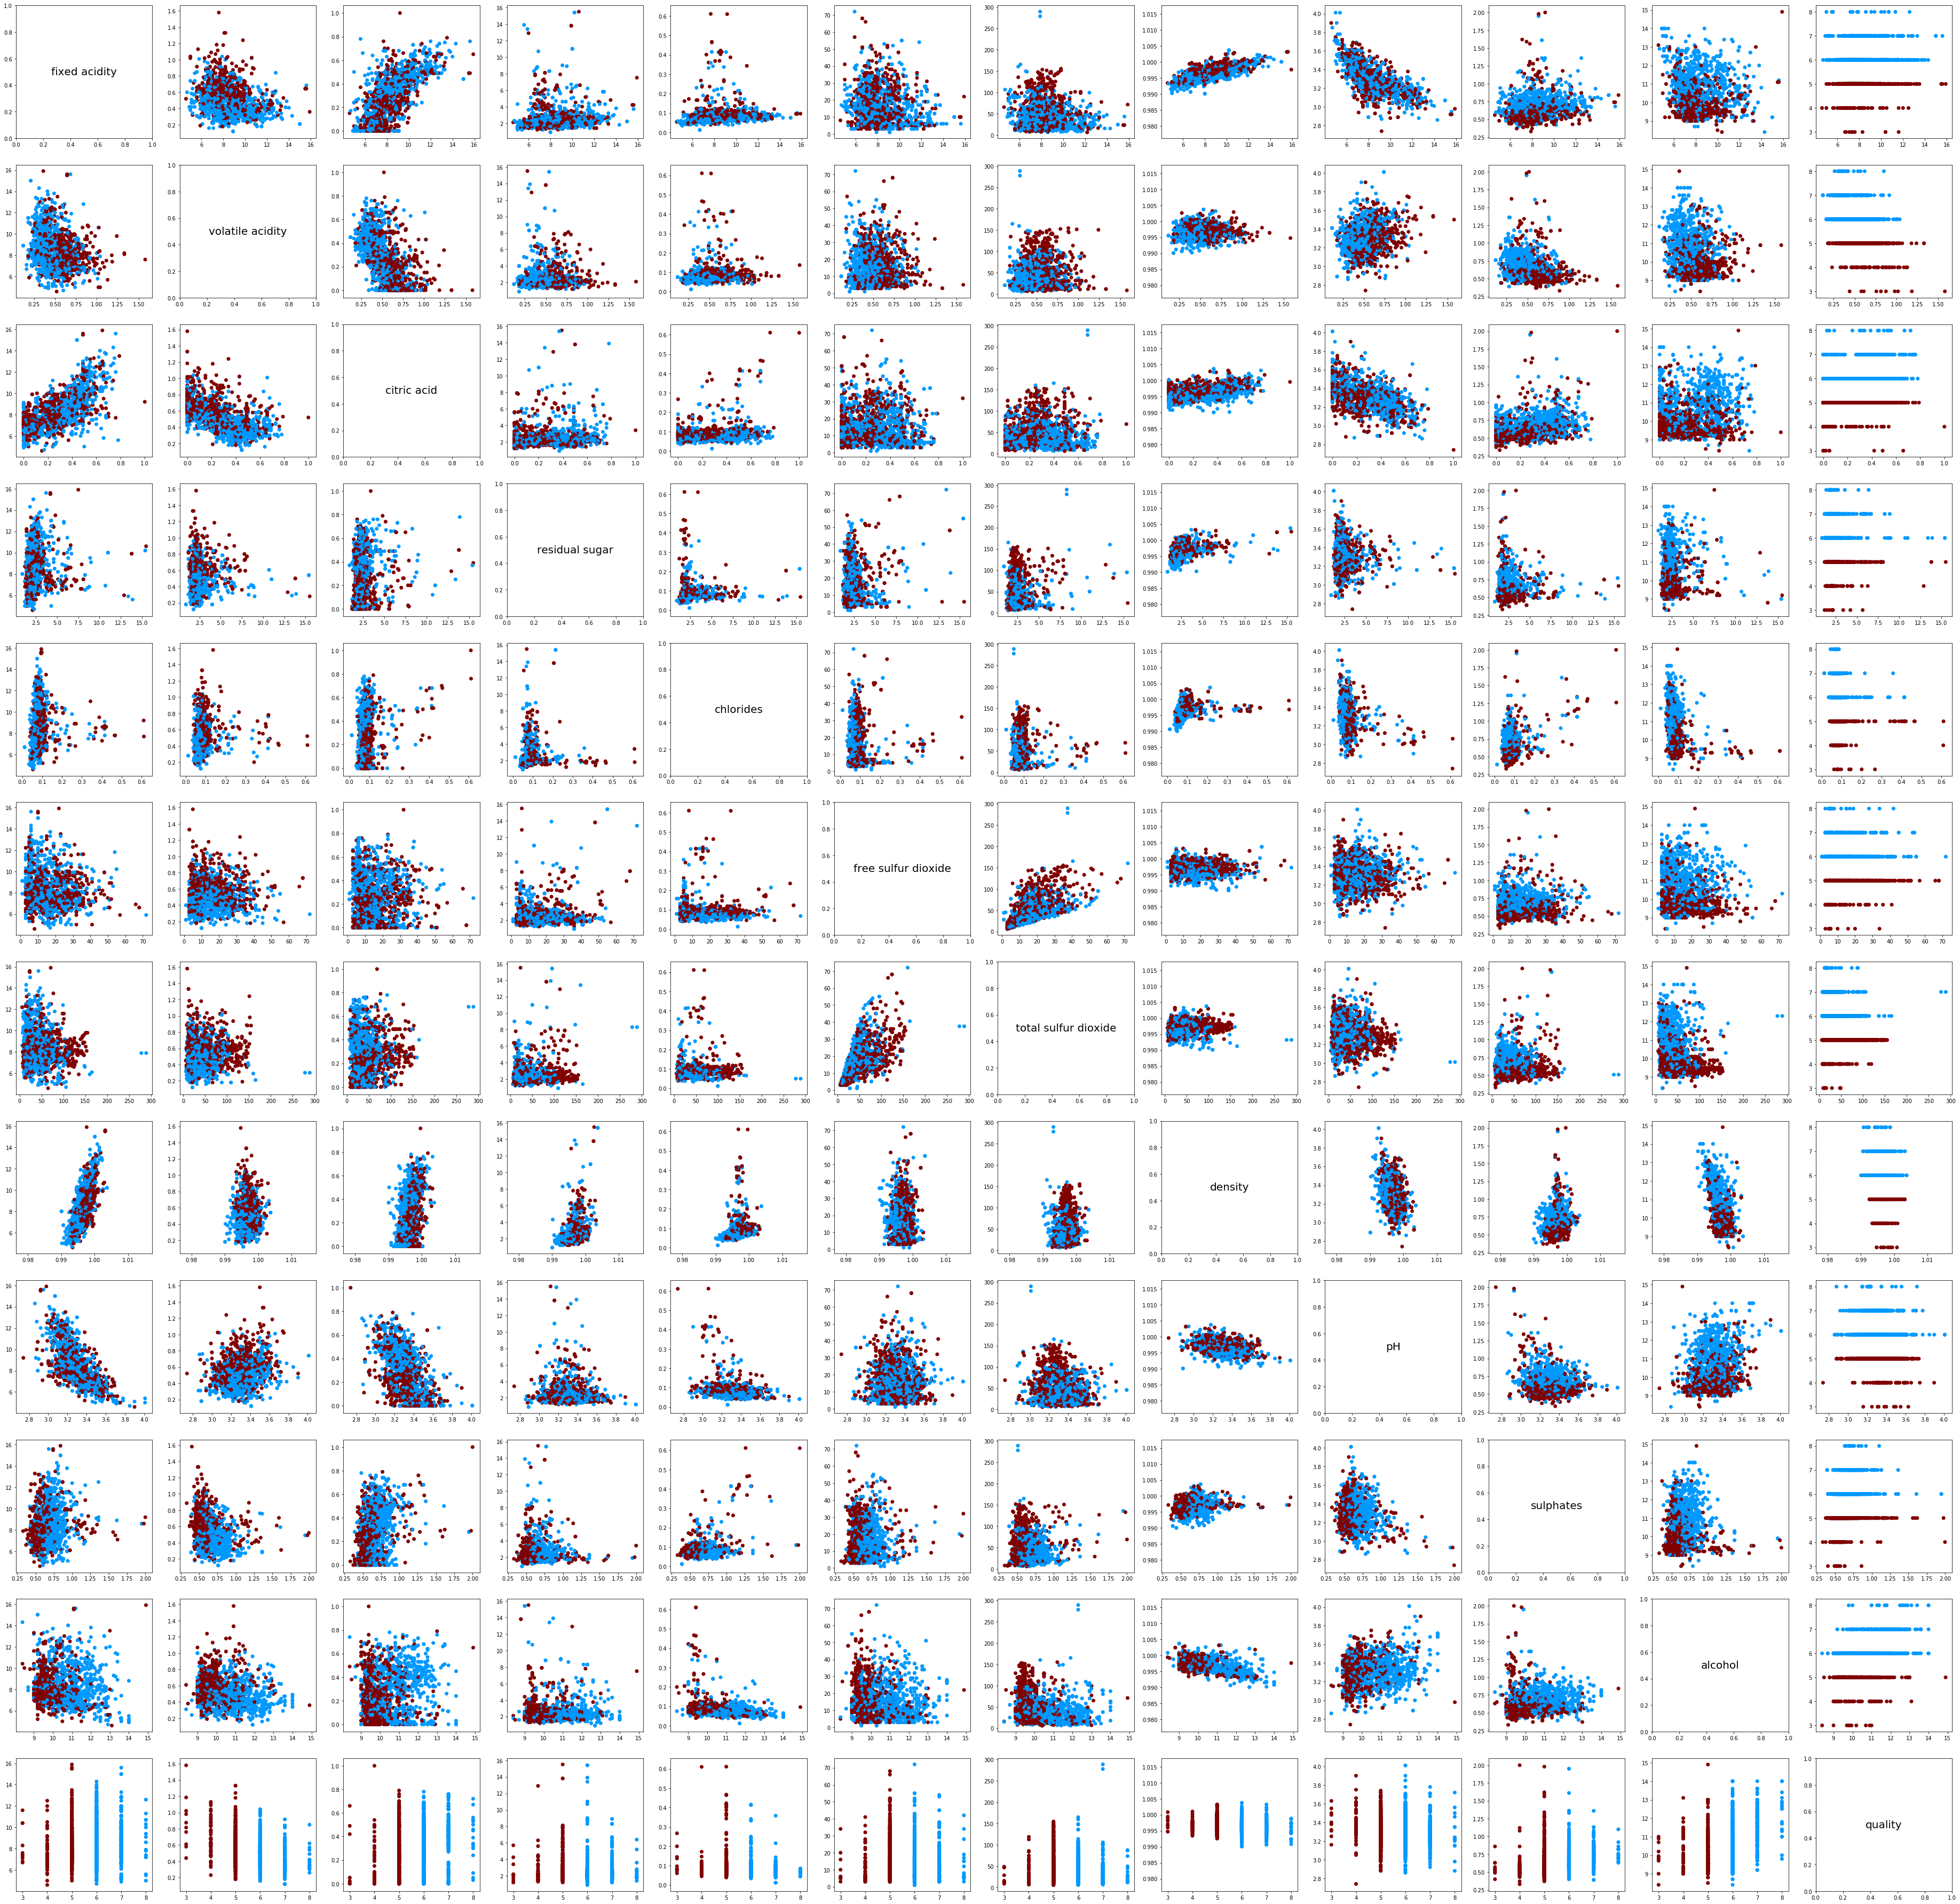

In [3]:
plot_scatter_matrix(rw_data, 6, 5, False)

***
**b)** Now that you’ve had a chance to analyze different chemical factors in red wines and
their relationship with high scores (8 or higher) and low scores (3 or lower), which
factors do you think will be most useful to your perceptron for distinguishing high
quality vs. low quality wines? Why?
***

The factors that appear to have more impact in the quality of the red wine are: **Alcohol, Sulphates and Volatile Acidity.**
    
**• Alcohol**: The average concentration of alcohol is 10.42. Only 42% of all wines have a concentration over 10.42, but 75% of them are considered good (quality >= 6).

**• Sulphates**: The scenario is similar to the Alcohol, the average Sulphates concentration is 0.65. 40% of all wines have more then average and 70% of them are considered good.

**• Volatile Acidity**: in this case, less is better. The average is 0.53, and the less Volatile Acidity the wine has, bigger are the chances of it being considered a good one. For example, over 80% of wines with volatile acidity lower than 0.35 are considered good.

***
# V.2 Learning to perceptron
**Now that you’ve explored the red wines, it’s time to put together a perceptron that can
learn to classify the wines as “good” or “bad” based on only chemical attributes!**
***
**a)** Implement a perceptron that:

    • Has randomly initialized weights and bias
    • Uses the Rosenblatt perceptron learning rule (with changeable learning rate)
    • Utilizes the heaviside step activation function (discrete version)

***
<div class="alert alert-block alert-warning">
    What the hell is <strong>Perceptron</strong>?<br><br>
    In machine learning, the perceptron is an algorithm for supervised learning of binary classifiers (functions that can decide whether an input, represented by a vector of numbers, belongs to some specific class or not). It is a type of linear classifier, a classification algorithm that makes its predictions based on a linear predictor function combining a set of weights with the feature vector. The algorithm allows for online learning, in that it processes elements in the training set one at a time.
</div>

***

In [4]:
import random

# function that replicate the behaviour of numpy.dot
def dot(x, y):
    res = 0
    for i in range(len(x)):
        res += x[i] * y[i]
    return res

class Perceptron:
    def __init__(self, no_of_inputs, threshold=100, learning_rate=0.01):
        # how many times the learning algorithm iterates through before ending(also known as epochs).
        self.threshold = threshold
        # determine the magnitude of change for our weights during each step through our training data.
        self.learning_rate = learning_rate
        # (no_of_inputs + 1) because the weights[0] will be our bias weight
        self.weights = [random.random() for _ in range(no_of_inputs + 1)]
        # Additional data for performance evaluation
        self.performance = []
        self.epochError = 0
           
    def predict(self, inputs):
        # the bias is added at the end of the multiplication
        summation = dot(inputs, self.weights[1:]) + self.weights[0]
        if summation > 0:
          activation = 1
        else:
          activation = 0            
        return activation

    def train(self, training_inputs, labels, verbose = True):
        if (self.threshold == 0):
            self.threshold == 1000
        for i in range(self.threshold):
            self.epochError = 0
            # zip inputs and labels to create an iterable object
            for inputs, label in zip(training_inputs, labels):
                prediction = self.predict(inputs)
                # (label - prediction) is the error, multiplied by the learning_rate and the inputs vector,
                # added to the weight vector (with bias weight removed)
                # [1:] to add the same for every column of training_inputs
                # the weight is changed everytime the result is not as expected
                self.weights[1:] += self.learning_rate * (label - prediction) * inputs
                # self.weights[0] is our bias weight, so we can’t add self.weights and inputs vectors directly,
                # as they’re of different dimensions. We update the bias in the same way as the other weights,
                # except, we don’t multiply it by the inputs vector.
                self.weights[0] += self.learning_rate * (label - prediction)
                self.epochError += int((self.learning_rate * (label - prediction)) != 0.0)
            self.performance.append((i, self.epochError, *self.weights[0], *self.weights[1:]))
            if (verbose == True):
                print(f"Training [epoch: {i}, numberOfErrors: {self.epochError}, weights: {self.weights[1:]}, bias: {self.weights[0]}]")

***
**b)** You’ll need to implement a function to train your perceptron. Your training function
should take in your red wine data as a parameter and should:

    • Have a way to specify number of training epochs
    • Train your perceptron until it makes no errors, if training epochs is set to 0,
    • Have a way to specify learning rate.
    • Return a list of python tuples containing (performance): 
    [(current_epoch, num_errors_at_epoch_end, [array_of_weights], bias), . . . ]
 
***
**Training data:** 2 chemical factors (for example, alcohol and pH) and only use wines with a score of 8 or higher and wines with a score of 3 or lower.
***

In [5]:
# | is or, & is and. Select specific columns [['a', 'b', 'c']] at the end
training_data = rw_data[(rw_data['quality'] >= 8) | (rw_data['quality'] <= 3)][['pH', 'alcohol', 'quality']]
training_data

pH  alcohol  quality
267   3.35    12.80        8
278   3.23    12.60        8
390   3.56    12.90        8
440   2.88     9.80        8
455   3.22    13.40        8
459   3.25     9.00        3
481   3.15    11.70        8
495   3.15    11.00        8
498   3.15    11.00        8
517   3.16     8.40        3
588   3.72    14.00        8
690   3.63    10.70        3
828   3.46    12.70        8
832   3.38     9.90        3
899   3.48    11.00        3
1061  3.21    12.50        8
1090  2.98    11.80        8
1120  3.20    13.10        8
1202  3.35    11.70        8
1269  3.50    14.00        8
1299  3.50    10.90        3
1374  3.32     9.80        3
1403  3.23    10.00        8
1449  3.23    11.30        8
1469  3.31     9.70        3
1478  3.40    10.20        3
1505  3.55     9.95        3
1549  3.24    11.40        8

In [20]:
# Data to be trained
x = training_data[['pH', 'alcohol']].values
# Data as reference for labels
y = training_data[['quality']].values
# transforming the 'quality' column: 8 = good(1) and 3 = bad(0)
for i in range(0, len(y)):
    if y[i] == 8:
        y[i] = 1
    elif y[i] == 3:
        y[i] = 0
# create new perceptron
v2_res = Perceptron(len(x[0]), 15000, 0.01)
# This will train the algorithm and we can see when it stops making mistakes (True parameter)
v2_res.train(x, y, False)

***
**c)** Now that you have a perceptron, a way to train your perceptron, and some data, you
need a way to confirm that your perceptron actually works. Write a function that
will take the output of your perceptron training function and your red wine data
and generate two plots in one figure:

    • The first plot should plot the number of errors your perceptron made as a function of epoch. Be careful with how you calculate errors!
    • The second plot should plot the decision boundary of your perceptron and also show ‘good’ and ‘bad’ wine data points on the final training epoch. This second plot should also shade ‘good’ and ‘bad’ areas!
    • Your function should allow the user to specify a specific epoch and see what the decision boundary of the perceptron was on that epoch. If a negative epoch is given, cause the plots to show the last epoch.
***

In [16]:
def plot_performance(performance, data, good_thresh, bad_thresh, epoch=-1, save_plot=False):
    
    if (epoch == -1):
        epoch = len(performance)

    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7)) 
    
    # ---------------------------
    # FIRST PLOT: errors x epoch
    # set scatter plot x and y
    epo = []
    err = []
    for i in range(epoch):
        epo.append(performance[i][0])
        err.append(performance[i][1])
    
    # draw scatter plot
    ax1.plot(epo, err, label='Errors x Epoch')
    # title and labels
    ax1.set(xlabel='Epoch', ylabel='Error')
    ax1.set_title('Errors x Epoch')
                  
    # ---------------------------
    # SECOND PLOT: decision boundary
    # pH x Alcohol, good/bad areas, max/min values
    
    bias = performance[epoch-1][2]
    
    # pH data
    weight_x = performance[epoch-1][3]
    min_x = data[:,0].min()
    max_x = data[:,0].max()
    var_x = max_x - min_x
    
    # alcohol data
    weight_y = performance[epoch-1][4]
    min_y = data[:,1].min()
    max_y = data[:,1].max()
    var_y = max_y - min_y
                  
    # boundary limit
    ax2.set(xlim = [min_x - 0.05 * var_x, max_x + 0.05 * var_x], 
            ylim = [min_y - 0.05 * var_y, max_y + 0.05 * var_y])
    # boundary line equations
    coords_x = range(int(min_x) - 1, int(max_x) + 2)
    coords_y = (- weight_x / weight_y) * coords_x + (- bias / weight_y)
    # draw decision boundary 
    ax2.plot(coords_x, coords_y, 'b--',label='Decision boundary')
    ax2.fill_between(coords_x, coords_y, min_y - 0.05 * var_y, color='pink')
    ax2.fill_between(coords_x, coords_y, max_y + 0.05 * var_y, color='palegreen')
    
    # scatter data
    good = data[(data[:,2] > good_thresh)]
    bad = data[(data[:,2] < bad_thresh)]
    # draw scatter
    ax2.scatter(good[:,0],good[:,1], c='green', s=20, label='good wines')
    ax2.scatter(bad[:,0],bad[:,1], c='red', s=20, label='bad wines')
    # title, labels and legend
    ax2.set_title("Decision boundary")
    ax2.set(xlabel="pH", ylabel='alcohol')
    ax2.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
    
    if (save_plot):
        plt.savefig('v1_a_result.png')

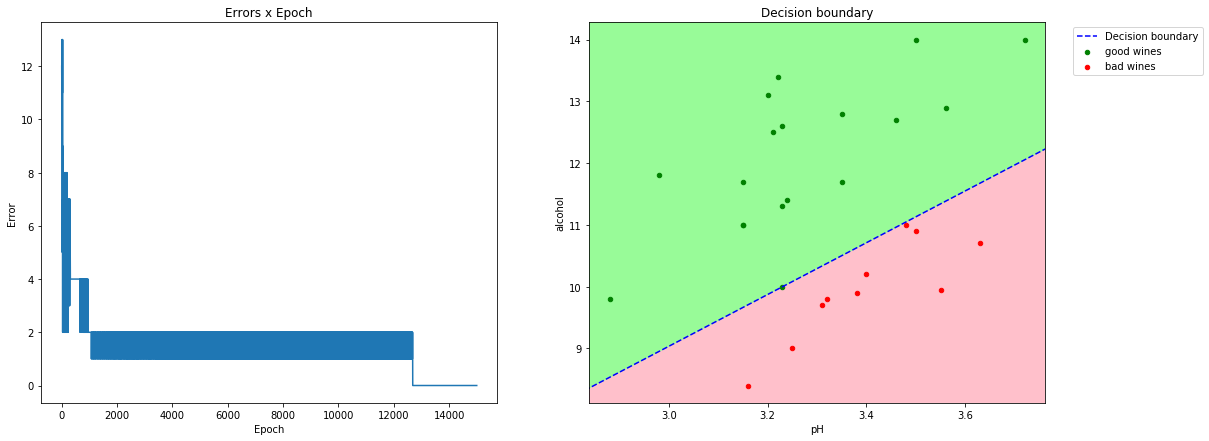

In [21]:
plot_performance(v2_res.performance, training_data[['pH', 'alcohol','quality']].values, 7, 4)

***
**d)** Your perceptron appears to work. . . but why is it taking so many epochs to train?
Maybe you can modify the red wine data to help the perceptron learn more quickly?
**Use the function you just created in part c) to plot and verify that your
perceptron is learning more efficiently!**

***
<div class="alert alert-block alert-warning">
    We can use <strong>Feature Scaling/Data Normalization</strong>:<br><br>
    Also known as min-max scaling or min-max normalization, is the simplest method and consists in rescaling the range of features to scale the range in [0, 1] or [−1, 1]. Selecting the target range depends on the nature of the data. The general formula for a min-max of [0, 1] is given as:<br><br>
    <strong>x' = ( x - min(x) ) / ( max(x) - min(x) )</strong>

</div>

***

In [9]:
def normalize_data(data):
    new = []
    
    # pH data
    min_x = data[:,0].min()
    max_x = data[:,0].max()
    var_x = max_x - min_x
    
    # alcohol data
    min_y = data[:,1].min()
    max_y = data[:,1].max()
    var_y = max_y - min_y
    
    for i in range(len(data)):
        tmp = data[i][0]
        data[i][0] = (tmp - min_x) / var_x
        tmp = data[i][1]
        data[i][1] = (tmp - min_y) / var_y

In [27]:
# FEATURE SCALING / DATA NORMALIZATION

# get the data normalized (values between 0 and 1) with labels for second plot
normalized_training = training_data[['pH', 'alcohol','quality']].values
normalize_data(normalized_training)
# get the data normalized without label, for train algorithm
training_x = training_data[['pH', 'alcohol']].values
normalize_data(training_x)

In [28]:
# create and train a new perceptron
v2_normalized = Perceptron(len(training_x[0]), 500, 0.01)
v2_normalized.train(normalized_x, y, False)

NameError: name 'normalized_x' is not defined

IndexError: list index out of range

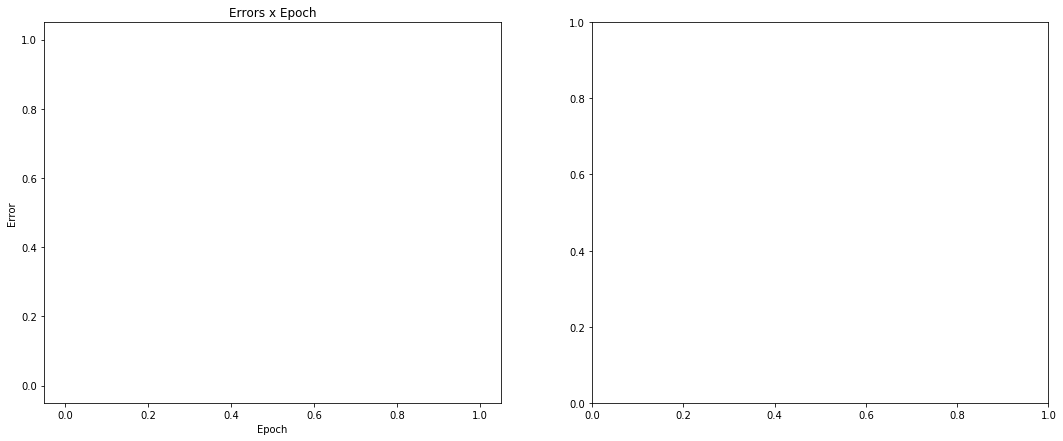

In [29]:
# normalized_training
# plot performance of new data
plot_performance(v2_normalized.performance, normalized_training, 7, 4)

***
# V.3 My fair ADALINE
Encouraged by the results of your perceptron, you decide to see if you can use it to
**distinguish between wines with a score of 4 and lower, and wines with a score
of 7 and higher**. Feeling confident, you decide to let the perceptron train until it can
find the best decision boundary.
***

In [22]:
# New data, normalized
training_data_v3 = rw_data[(rw_data['quality'] >= 7) | (rw_data['quality'] <= 4)][['pH', 'alcohol', 'quality']]

# Full data with labels, normalized, for the second chart
fulldata_v3 = training_data_v3.values
normalize_data(fulldata_v3)

# data for training without labels, normalized
x_v3 = y_v3 = training_data_v3[['pH', 'alcohol']].values
normalize_data(x_v3)

# only labels (0 bad, 1 good)
y_v3 = training_data_v3[['quality']].values
# transforming the 'quality' column: >=7 good(1) and <=4 bad(0)
for i in range(0, len(y_v3)):
    if y_v3[i] >= 7:
        y_v3[i] = 1
    elif y_v3[i] <= 4:
        y_v3[i] = 0

# print(fulldata_v3)
# print(x_v3)
# print(y_v3)

In [25]:
# New perceptron and training
v3_normalized = Perceptron(len(x_v3[0]), 15000, 0.01)
v3_normalized.train(x_v3, y_v3, False)

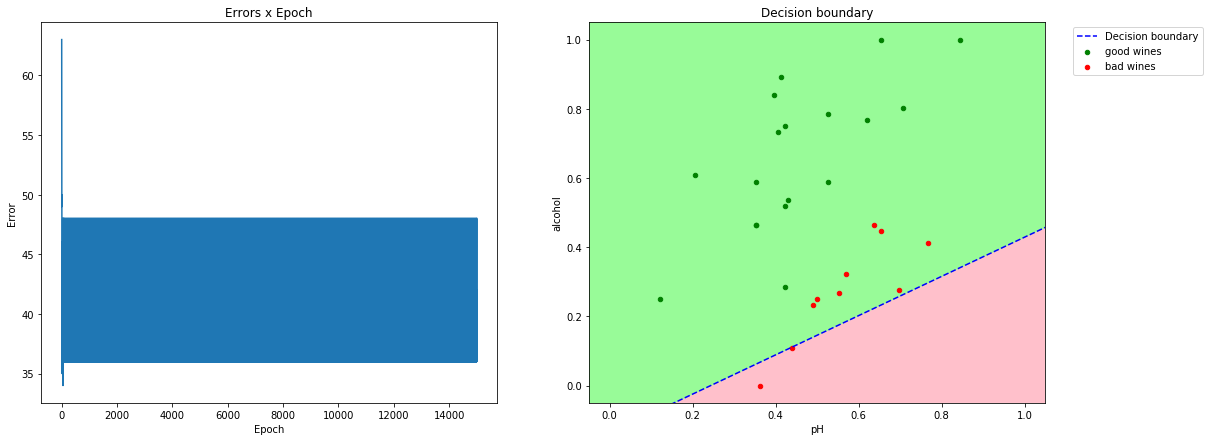

In [26]:
# Plot resul of bigger data, normalized
plot_performance(v3_normalized.performance, fulldata_v3, 7, 4)

***
**a)** 
**Marvin notices and chides you for torturing your perceptron. Why?
You decide to upgrade your perceptron to handle this harder classification task. You’ve
heard a bit about the gradient descent technique and also about ADALINE, maybe these
will do the trick?**

**b)** Implement an ADALINE that:

    • Has randomly initialized weights and bias
    • Uses a linear activation function and some kind of quantizer
    • Uses the Widrow-Hoff learning rule

**c)** You’ll need to implement a function to train your ADALINE. Your training function should:

    • Take in your red wine data as a parameter
    • Have a way to specify number of training epochs
    • If training epochs is set to 0, your ADALINE should train until it converges on a good set of weights.
    • Have a way to specify learning rate.
    • Have an option to perform either online learning or batch learning
***

In [234]:

# function to replicate the behaviour of numpy array.T
def matrix_transpose(x):
    row = len(x)
    col = len(x[0])
    t_x = [[0 for _ in range(row)] for _ in range(col)]
    for i in range(col):
        for j in range(row):
            t_x[i][j] = x[j][i]
    return t_x

def dot_matrix(x, y):
    y = matrix_transpose(y)
    row = len(x)
    col = len(y)
    result = [[0 for _ in range(col)] for _ in range(row)]
    for i in range(len(x)):
        for j in range(len(y)):
            result[i][j] = dot(x[i], y[j])
    return result

class Adaline():
    def __init__(self, no_of_inputs):
        # (no_of_inputs + 1) because the weights[0] will be our bias weight
        self.weights = [random.random() for _ in range(no_of_inputs + 1)]
        self.performance = []
        self.epochError = 0
    
    def predict(self, inputs):
        # the bias is added at the end of the multiplication
        summation = dot(inputs, self.weights[1:]) + self.weights[0]
        if summation >= 0:
          activation = 1
        else:
          activation = -1
        return activation
    
    def train(self, training_inputs, labels, epoch=1000, learning_rate=0.01, online=True):
        
        if (online == True):
            batch_size = 1
        else:
            batch_size = 32
            
        cost = 0
        
        if (epoch == 0):
            epoch = 1000
            
        for i in range(epoch):
            for inputs, label in zip(training_inputs, labels):
                prediction = self.predict(inputs)
                
                error = label - prediction
            
                self.weights[0] += learning_rate * error.sum()
                self.weights[1:] += learning_rate * dot_matrix(error, inputs)
                cost = (error**2).sum() / 2.0
#                 self.epochError += int((self.learning_rate * (label - prediction)) != 0.0)
                
#             self.performance.append(cost)
            
#         return self


In [235]:
test = Adaline(len(x_v3[0]))
test.train(x_v3, y_v3, 2)

TypeError: object of type 'numpy.float64' has no len()